In [4]:
# Load our data from kaggle  using kaggle API

!pip install kaggle
!mkdir -p ~/kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d furcifer/bangla-newspaper-dataset

 99% 1.02G/1.03G [00:12<00:00, 134MB/s]
100% 1.03G/1.03G [00:12<00:00, 85.2MB/s]


In [5]:
#unzip the data file
!unzip /content/bangla-newspaper-dataset.zip

Archive:  /content/bangla-newspaper-dataset.zip
  inflating: data/data.json          
  inflating: data_v2/data_v2.json    


# **Load the dataset and explore**

In [6]:
#import required libraries

import pandas as pd
import json
# Open the JSON file
with open('/content/data_v2/data_v2.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Convert JSON data to a dataframe
df = pd.DataFrame(data)


In [7]:
#view first five rows
df.head()

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭",[গাজীপুর],0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",http://www.prothom-alo.com/bangladesh/article/...,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",[টেনিস],0,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,http://www.prothom-alo.com/sports/article/19028,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",[রাজনীতি],0,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,http://www.prothom-alo.com/bangladesh/article/...,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",[গবেষণা],0,পাসওয়ার্ড ভুলে যান!,http://www.prothom-alo.com/technology/article/...,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",[কম্পিউটার],0,চলে গেলেন মাউস উদ্ভাবক,http://www.prothom-alo.com/technology/article/...,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [8]:
# Taking only useful rows

new_df = df[['content','category']]

In [9]:
#view first few rows
new_df.head()

,content,category
0,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
1,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...,sports
2,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,bangladesh
3,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,technology
4,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,technology


# **Preprocessing**

In [10]:
#checking null values

new_df.isna().sum()

content     0
category    0
dtype: int64

In [11]:
# Number of categories of news

new_df['category'].value_counts()

bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: category, dtype: int64

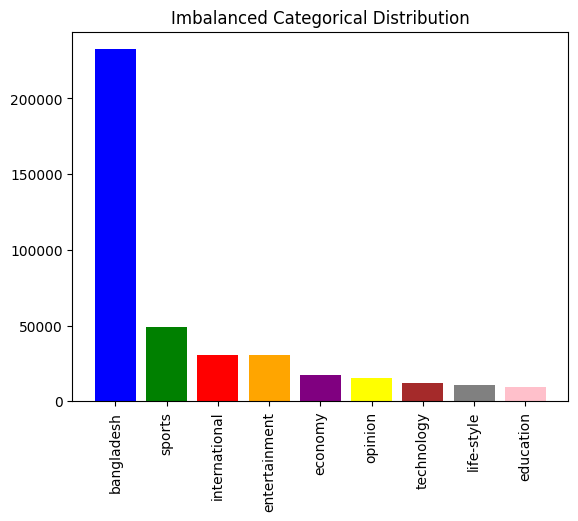

In [12]:
#visualization
import matplotlib.pyplot as plt
color_palette = ['blue', 'green', 'red', 'orange', 'purple', 'yellow',
                 'brown', 'gray', 'pink']

plt.bar(new_df['category'].value_counts().index,new_df['category'].value_counts().values,
        color=color_palette)
plt.title('Imbalanced Categorical Distribution')
plt.xticks(rotation=90)
plt.show()

# **Split the feature and target variable**

In [13]:
X = new_df[['content']]
y = new_df['category']

# **Balancing the data**

In [14]:
#useing randomundersampler to reduce the majory class

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [15]:
X_resampled

,content
0,আওয়ামী লীগে ‘কাউয়া’ (কাক) ঢুকেছে বলে মন্তব্য ক...
1,বর্তমান নির্বাচনকালীন সরকারের সময়ে জাতীয় বিশ্ব...
2,হোলি আর্টিজান বেকারিতে জঙ্গি হামলার মামলাটি বি...
3,গোয়েন্দা তৎপরতায় আপনি যখন আপনার প্রতিপক্ষের বি...
4,নরসিংদীতে গতকাল মঙ্গলবার অজ্ঞাতপরিচয় এক যুবকের...
...,...
87484,দেশের কম্পিউটার সফটওয়্যার ব্যবসা খাতের সংগঠন ব...
87485,অনলাইনে যাঁরা কেনাকাটা করতে চান তাঁরা ২৪ ঘণ্টা...
87486,"দেশের বাজারে রেডমি ৬এ, রেডমি ৬ এবং এমআই এ২ লাই..."
87487,ইয়াহু ব্যবহারকারীরা ম্যালওয়্যার আক্রান্ত হওয়ার...


In [16]:
y_resampled.value_counts()

bangladesh       9721
economy          9721
education        9721
entertainment    9721
international    9721
life-style       9721
opinion          9721
sports           9721
technology       9721
Name: category, dtype: int64

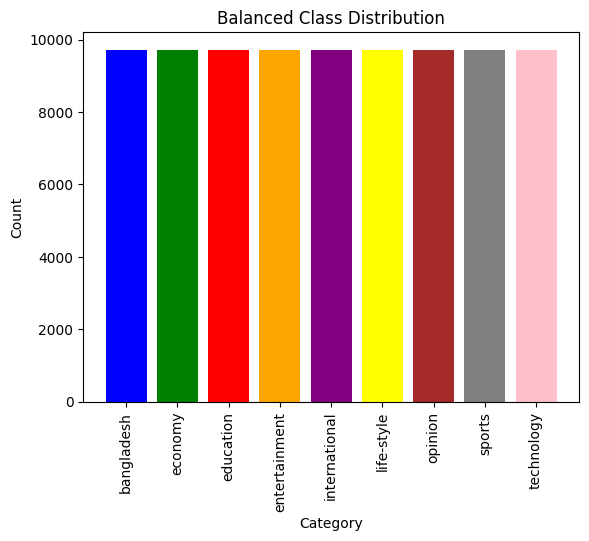

In [17]:
# Get the class labels and their counts

index = y_resampled.value_counts().index
values = y_resampled.value_counts().values

# Plot the bar chart
plt.bar(index,values,color=color_palette)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balanced Class Distribution')
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_encoded = label_encoder.fit_transform(y_resampled)

# Print the encoded labels
print(y_encoded)

[0 0 0 ... 8 8 8]


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import LSTM,GRU,Bidirectional,Embedding,Dense,Flatten
from tensorflow.keras import Sequential
import numpy as np

In [20]:
X_resampled['content']

0        আওয়ামী লীগে ‘কাউয়া’ (কাক) ঢুকেছে বলে মন্তব্য ক...
1        বর্তমান নির্বাচনকালীন সরকারের সময়ে জাতীয় বিশ্ব...
2        হোলি আর্টিজান বেকারিতে জঙ্গি হামলার মামলাটি বি...
3        গোয়েন্দা তৎপরতায় আপনি যখন আপনার প্রতিপক্ষের বি...
4        নরসিংদীতে গতকাল মঙ্গলবার অজ্ঞাতপরিচয় এক যুবকের...
                               ...                        
87484    দেশের কম্পিউটার সফটওয়্যার ব্যবসা খাতের সংগঠন ব...
87485    অনলাইনে যাঁরা কেনাকাটা করতে চান তাঁরা ২৪ ঘণ্টা...
87486    দেশের বাজারে রেডমি ৬এ, রেডমি ৬ এবং এমআই এ২ লাই...
87487    ইয়াহু ব্যবহারকারীরা ম্যালওয়্যার আক্রান্ত হওয়ার...
87488    যাঁরা মোবাইলে গাড়ি চালানোর গেম খেলতে চান, তাঁদ...
Name: content, Length: 87489, dtype: object

In [21]:
tk = Tokenizer()

In [22]:
tk.fit_on_texts(X_resampled['content'])

In [23]:
seq = tk.texts_to_sequences(X_resampled['content'])

In [24]:
vector = pad_sequences(seq,padding='post',maxlen=100)

In [25]:
vector

array([[  17950,    8481,   17498, ...,   17856,    4914,    1783],
       [    476,    7911,     179, ...,       0,       0,       0],
       [    275,    3946,     402, ...,     790,     147,  361335],
       ...,
       [     74,     276,   22406, ...,   12677,       0,       0],
       [    453,    3627,    9048, ...,      10,   10232,      18],
       [     89,     168, 1045463, ...,    2639,    3477,   10106]],
      dtype=int32)

In [26]:
X = np.array(vector)
y = np.array(y_encoded)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [28]:
#Design the RNN model using Sequential API

model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=128,input_length=100))
#model.add(tf.keras.layers.Bidirectional(LSTM(units=100,return_sequences=True)))
model.add(LSTM(units=100))
model.add(Flatten())
model.add(Dense(units=9,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=2,batch_size=32,validation_data=(x_test,y_test))

In [31]:
model.evaluate(x_test,y_test)

547/547 [==============================] - 21s 39ms/step - loss: 0.4758 - accuracy: 0.8727


[0.4757772982120514, 0.8727282881736755]

In [32]:
import numpy as np
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

547/547 [==============================] - 20s 35ms/step


In [33]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y_test

array([8, 8, 1, ..., 2, 0, 0])

In [35]:
predicted_value = np.argmax(y_pred, axis=1)
predicted_value

array([5, 8, 1, ..., 2, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score,r2_score,precision_score
print(accuracy_score(y_test,predicted_value))
print(r2_score(y_test,predicted_value))

0.8629557663732998
0.6688507397302378


In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cnf = confusion_matrix(y_test,predicted_value)

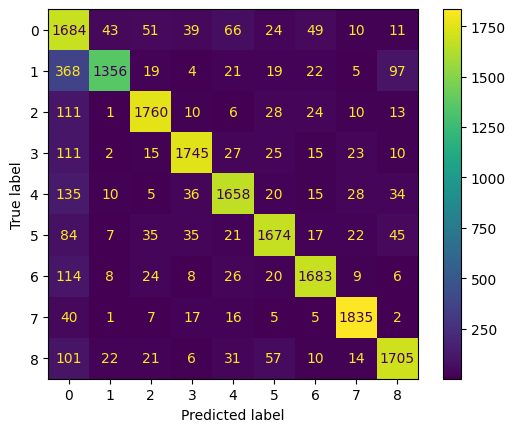

In [38]:
import matplotlib.pyplot as plt
ax = ConfusionMatrixDisplay(confusion_matrix=cnf).plot()
plt.show()

In [39]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

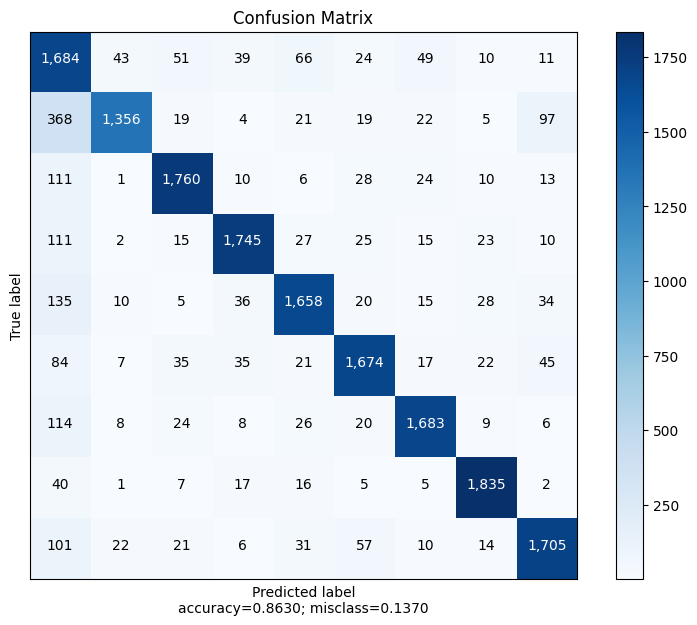

In [40]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test,predicted_value),
                      normalize=False,
                      target_names=[],
                      title="Confusion Matrix")

In [41]:
def process_text(text):
    tk.fit_on_texts(text)
    seq = tk.texts_to_sequences(text)
    vector = pad_sequences(seq,padding='post',maxlen=300)
    return vector


In [42]:
vct = process_text('''ঘরের মাঠে নিউজিল্যান্ডের বিপক্ষে দুই টেস্টের সিরিজে বাংলাদেশ দলের সবচেয়ে অভিজ্ঞ বোলার তাইজুল ইসলাম। জাতীয় লিগে টানা পাঁচ ম্যাচ খেলার পর ষষ্ঠ রাউন্ড থেকে তাই বিশ্রামে রাজশাহী বিভাগের অধিনায়ক। তাইজুলের শূন্যতা অবশ্য বুঝতে দেননি রাজশাহীর আরেক বাঁহাতি স্পিনার সানজামুল ইসলাম।

জহুর আহমেদ চৌধুরী স্টেডিয়ামে চট্টগ্রামের বিপক্ষে আজ দ্বিতীয় দিনের খেলায় ৫ উইকেট নিয়েছেন তিনি, প্রথম শ্রেণির ক্রিকেটে যা সানজামুলের ২৫তম ৫ উইকেট। তাঁর এই বোলিংয়ের সৌজন্যে চট্টগ্রাম বিভাগকে ২৯০ রানে থামাতে পেরেছে রাজশাহী। চট্টগ্রামের হয়ে শতকের সুযোগ ছিল ইরফান শুক্কুর ও শাহাদাত হোসেনের।''')

In [43]:
vct

array([[   56,     0,     0, ...,     0,     0,     0],
       [ 5783,     0,     0, ...,     0,     0,     0],
       [35009,     0,     0, ...,     0,     0,     0],
       ...,
       [35009,     0,     0, ...,     0,     0,     0],
       [ 5783,     0,     0, ...,     0,     0,     0],
       [  247,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [44]:
pre = np.argmax(model.predict(vct),axis=1)

18/18 [==============================] - 2s 84ms/step


In [45]:
y_pred_prob_of_vct = model.predict(vct)
y_pred_vct = (y_pred_prob_of_vct > 0.5).astype(int)

18/18 [==============================] - 3s 162ms/step


In [46]:
np.argmax(y_pred_vct, axis=1)[0]

2